In [1]:
import numpy as np 
import xarray as xr
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt 

plt.rcParams['text.usetex'] = True

In [2]:
dx100_fps = glob('../Synthetic/Smoothed_Test/hdf5/smoothtest_500a_dt_1_dx_100_mb_2.*')
dx100_fps.sort()

xarrays = []
for file in dx100_fps:
    xarrays.append(xr.open_dataset(file))
    
dx100 = xr.concat(xarrays, 
                       pd.Index(data = np.arange(2.00, 3.00, 0.1), name='Delta_MB'))

dx100['H']   = dx100.z_s - dx100.z_b
dx100['Vol'] = dx100.H.integrate('x') / dx100.isel(t=0).H.integrate('x')

In [3]:
dx200_fps = glob('../Synthetic/Smoothed_Test/hdf5/smoothtest_500a_dt_2_dx_200_mb_2.*')
dx200_fps.sort()

xarrays = []
for file in dx200_fps:
    xarrays.append(xr.open_dataset(file))
    
dx200 = xr.concat(xarrays, 
                       pd.Index(data = np.arange(2.00, 3.00, 0.1), name='Delta_MB'))

dx200['H']   = dx200.z_s - dx200.z_b
dx200['Vol'] = dx200.H.integrate('x') / dx200.isel(t=0).H.integrate('x')

In [4]:

import matplotlib.colors as mcolors
import matplotlib.cm as cm

############################################################
# For Seting up the colorbar: 
#    - http://csc.ucdavis.edu/~jmahoney/matplotlib-tips.html
############################################################

colormap = cm.plasma
normalize = mcolors.Normalize(vmin=np.min(dx200.Delta_MB), vmax=np.max(dx200.Delta_MB))

# Colorbar setup
s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
s_map.set_array(dx200.Delta_MB)

# If color parameters is a linspace, we can set boundaries in this way
halfdist = (dx200.Delta_MB[1] - dx200.Delta_MB[0])/2.0
boundaries = np.linspace(dx200.Delta_MB[0] - halfdist, 
                         dx200.Delta_MB[-1] + halfdist, 
                         len(dx200.Delta_MB) + 1)

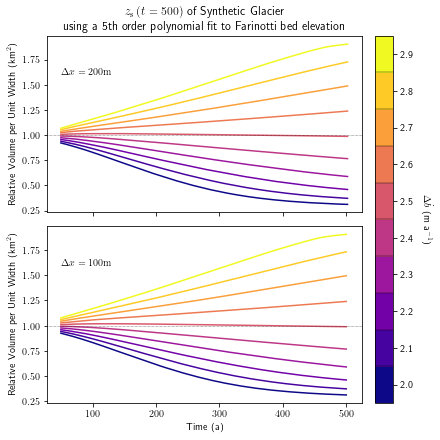

In [5]:
fig, ax = plt.subplots(2,1, figsize=(6, 6), sharex=True, sharey=True, constrained_layout=True)

for delta in dx200.Delta_MB: 
    color = colormap(normalize(delta.values))
    ax[0].plot(dx200.t[25:], dx200.sel(Delta_MB=delta).Vol[25:], color=color)
    ax[1].plot(dx100.t[50:], dx100.sel(Delta_MB=delta).Vol[50:], color=color)

    
ax[0].axhline(1.0, ls=':', c='k', lw=0.5)
ax[1].axhline(1.0, ls=':', c='k', lw=0.5)
cbar = fig.colorbar(s_map, 
                    spacing='proportional', 
                    ticks=dx200.Delta_MB, 
                    ax=ax, 
                    boundaries=boundaries, 
                    drawedges=True, 
                    format='%2.1f')

cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)
cbar.ax.tick_params() 


ax[0].text(50, 1.6, '$\Delta x = 200 \\rm{ m}$')
ax[1].text(50, 1.6, '$\Delta x = 100 \\rm{ m}$')

ax[0].set_ylabel('Relative Volume per Unit Width (km$^2$)')
ax[1].set_ylabel('Relative Volume per Unit Width (km$^2$)')
ax[1].set_xlabel('Time (a)')

ax[0].set_title(r'\begin{center} $z_{\rm s} \left( t=500 \right)$ of Synthetic Glacier \\' +\
                 'using a 5th order polynomial fit to Farinotti bed elevation \end{center}', pad = 20.0)

fig.savefig('../plots/smooth_bed/2-3_delta_mb_Relative_Vol.png', dpi=300, bbox_inches='tight', facecolor='w')

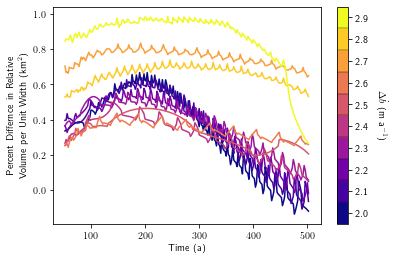

In [6]:
fig, ax = plt.subplots()

for delta in dx100.Delta_MB: 
    color = colormap(normalize(delta.values))
    ax.plot(dx200.t[26::], 
            100*(dx100.sel(Delta_MB=delta).Vol[::2][25:] - dx200.sel(Delta_MB=delta).Vol[25:])/dx100.sel(Delta_MB=delta).Vol[::2][25:], 
            color=color)
    
cbar = fig.colorbar(s_map, 
                    spacing='proportional', 
                    ticks=dx200.Delta_MB, 
                    ax=ax, 
                    boundaries=boundaries, 
                    drawedges=True, 
                    format='%2.1f')

cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)
cbar.ax.tick_params()

ax.set_ylabel(r'\begin{center} Percent Differnce in Relative \\ Volume per Unit Width (km$^2$) \end{center}')
ax.set_xlabel('Time (a)')

fig.savefig('../plots/smooth_bed/2-3_delta_mb_DIFF_Relative_Vol.png', dpi=300, bbox_inches='tight', facecolor='w')

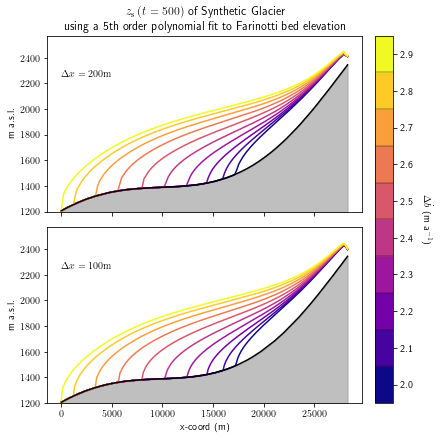

In [7]:
fig, ax = plt.subplots(2,1, figsize=(6, 6), sharex=True, sharey=True, constrained_layout=True)

for delta in dx200.Delta_MB: 
    color = colormap(normalize(delta.values))
    ax[0].plot(dx200.x, dx200.isel(t=-1).sel(Delta_MB=delta).z_s, color=color)
    ax[1].plot(dx100.x, dx100.isel(t=-1).sel(Delta_MB=delta).z_s, color=color)
    
ax[0].plot(dx200.x, dx200.isel(t=-1).sel(Delta_MB=delta).z_b, 'k')
ax[1].plot(dx100.x, dx100.isel(t=-1).sel(Delta_MB=delta).z_b, 'k')

ax[0].fill_between(dx200.x, dx200.isel(t=0,Delta_MB=0).z_b, color='gray', alpha=0.5)
ax[1].fill_between(dx100.x, dx100.isel(t=0,Delta_MB=0).z_b, color='gray', alpha=0.5)


cbar = fig.colorbar(s_map, 
                    spacing='proportional', 
                    ticks=dx200.Delta_MB, 
                    ax=ax, 
                    boundaries=boundaries, 
                    drawedges=True, 
                    format='%2.1f')

cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)
cbar.ax.tick_params() 

ax[0].text(0, 2250, '$\Delta x = 200 \\rm{ m}$')
ax[1].text(0, 2250, '$\Delta x = 100 \\rm{ m}$')

ax[0].set_ylim(1200, None)
ax[1].set_ylim(1200, None)

ax[0].set_ylabel('m a.s.l.')
ax[1].set_ylabel('m a.s.l.')
ax[1].set_xlabel('x-coord (m)')

ax[0].set_title(r'\begin{center} $z_{\rm s} \left( t=500 \right)$ of Synthetic Glacier \\' +\
                 'using a 5th order polynomial fit to Farinotti bed elevation \end{center}', pad = 20.0)

fig.savefig('../plots/smooth_bed/2-3_delta_mb_Z_s_at_500a.png', dpi=300, bbox_inches='tight', facecolor='w')

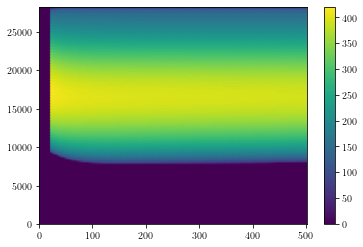

In [8]:
plt.pcolormesh(dx200.t,dx200.x, dx200.isel(Delta_MB=5).H, shading='gouraud')
plt.colorbar()

In [9]:
dx200_fps = glob('../Synthetic/Smoothed_Test/hdf5/smoothtest_1500a_dt_2_dx_200_mb_2.*')
dx200_fps.sort()

xarrays = []
for file in dx200_fps:
    xarrays.append(xr.open_dataset(file))
    
dx200 = xr.concat(xarrays, 
                       pd.Index(data = np.arange(2.50, 2.71, 0.01), name='Delta_MB'))

dx200['H']   = dx200.z_s - dx200.z_b
dx200['Vol'] = dx200.H.integrate('x') / dx200.isel(t=0).H.integrate('x')

In [10]:

import matplotlib.colors as mcolors
import matplotlib.cm as cm

############################################################
# For Seting up the colorbar: 
#    - http://csc.ucdavis.edu/~jmahoney/matplotlib-tips.html
############################################################

colormap = cm.plasma
normalize = mcolors.Normalize(vmin=np.min(dx200.Delta_MB), vmax=np.max(dx200.Delta_MB))

# Colorbar setup
s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
s_map.set_array(dx200.Delta_MB)

# If color parameters is a linspace, we can set boundaries in this way
halfdist = (dx200.Delta_MB[1] - dx200.Delta_MB[0])/2.0
boundaries = np.linspace(dx200.Delta_MB[0] - halfdist, 
                         dx200.Delta_MB[-1] + halfdist, 
                         len(dx200.Delta_MB) + 1)

Text(0.5, 1.0, '\\begin{center} $z_{\\rm s} \\left( t=500 \\right)$ of Synthetic Glacier \\\\using a 5th order polynomial fit to Farinotti bed elevation \\end{center}')

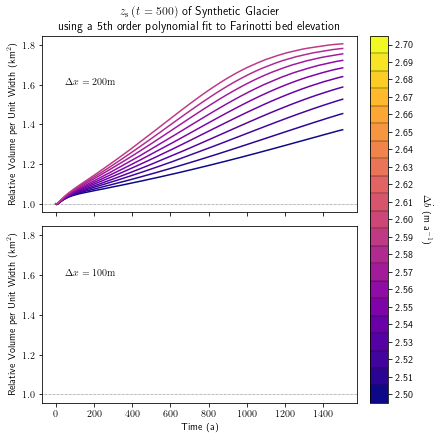

In [18]:
fig, ax = plt.subplots(2,1, figsize=(6, 6), sharex=True, sharey=True, constrained_layout=True)

for delta in dx200.Delta_MB[:10]: 
    color = colormap(normalize(delta.values))
    ax[0].plot(dx200.t, dx200.sel(Delta_MB=delta).Vol, color=color)
    #ax[1].plot(dx100.t[50:], dx100.sel(Delta_MB=delta).Vol[50:], color=color)

    
ax[0].axhline(1.0, ls=':', c='k', lw=0.5)
ax[1].axhline(1.0, ls=':', c='k', lw=0.5)
cbar = fig.colorbar(s_map, 
                    spacing='proportional', 
                    ticks=dx200.Delta_MB, 
                    ax=ax, 
                    boundaries=boundaries, 
                    drawedges=True, 
                    format='%2.2f')

cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)
cbar.ax.tick_params() 


ax[0].text(50, 1.6, '$\Delta x = 200 \\rm{ m}$')
ax[1].text(50, 1.6, '$\Delta x = 100 \\rm{ m}$')

ax[0].set_ylabel('Relative Volume per Unit Width (km$^2$)')
ax[1].set_ylabel('Relative Volume per Unit Width (km$^2$)')
ax[1].set_xlabel('Time (a)')

ax[0].set_title(r'\begin{center} $z_{\rm s} \left( t=500 \right)$ of Synthetic Glacier \\' +\
                 'using a 5th order polynomial fit to Farinotti bed elevation \end{center}', pad = 20.0)

#fig.savefig('../plots/smooth_bed/2-3_delta_mb_Relative_Vol.png', dpi=300, bbox_inches='tight', facecolor='w')

Text(0.5, 1.0, '\\begin{center} $z_{\\rm s} \\left( t=500 \\right)$ of Synthetic Glacier \\\\using a 5th order polynomial fit to Farinotti bed elevation \\end{center}')

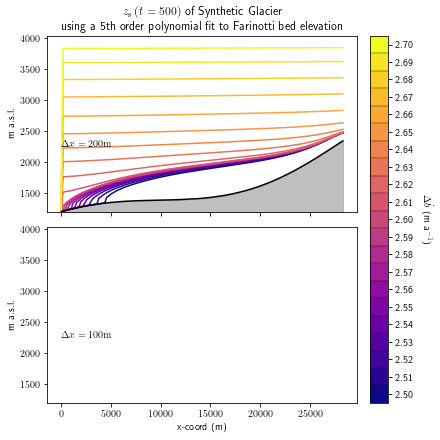

In [16]:
fig, ax = plt.subplots(2,1, figsize=(6, 6), sharex=True, sharey=True, constrained_layout=True)

for delta in dx200.Delta_MB: 
    color = colormap(normalize(delta.values))
    ax[0].plot(dx200.x, dx200.isel(t=-1).sel(Delta_MB=delta).z_s, color=color)
    #ax[1].plot(dx100.x, dx100.isel(t=-1).sel(Delta_MB=delta).z_s, color=color)
    
ax[0].plot(dx200.x, dx200.isel(t=-1).sel(Delta_MB=delta).z_b, 'k')
#ax[1].plot(dx100.x, dx100.isel(t=-1).sel(Delta_MB=delta).z_b, 'k')

ax[0].fill_between(dx200.x, dx200.isel(t=0,Delta_MB=0).z_b, color='gray', alpha=0.5)
#ax[1].fill_between(dx100.x, dx100.isel(t=0,Delta_MB=0).z_b, color='gray', alpha=0.5)


cbar = fig.colorbar(s_map, 
                    spacing='proportional', 
                    ticks=dx200.Delta_MB, 
                    ax=ax, 
                    boundaries=boundaries, 
                    drawedges=True, 
                    format='%2.2f')

cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)
cbar.ax.tick_params() 

ax[0].text(0, 2250, '$\Delta x = 200 \\rm{ m}$')
ax[1].text(0, 2250, '$\Delta x = 100 \\rm{ m}$')

ax[0].set_ylim(1200, None)
ax[1].set_ylim(1200, None)

ax[0].set_ylabel('m a.s.l.')
ax[1].set_ylabel('m a.s.l.')
ax[1].set_xlabel('x-coord (m)')

ax[0].set_title(r'\begin{center} $z_{\rm s} \left( t=500 \right)$ of Synthetic Glacier \\' +\
                 'using a 5th order polynomial fit to Farinotti bed elevation \end{center}', pad = 20.0)

#fig.savefig('../plots/smooth_bed/2-3_delta_mb_Z_s_at_500a.png', dpi=300, bbox_inches='tight', facecolor='w')

In [2]:
#fp = '../Synthetic/farinotti_corrected/exp_01_elevation_dependent/hdf5/BC4_Vx=0.nc'
fp = '../Synthetic/farinotti_corrected/exp_01_elevation_dependent/hdf5/BC3_Body1_Vx=0_Bubbles_1999.nc'
fp2 = '../Synthetic/farinotti_corrected/exp_01_elevation_dependent/hdf5/BC3_Body1_Vx=0.nc'

arrays = []
for array in [fp, fp2]:
    arrays.append(xr.open_dataset(array))
    


In [3]:
for array in arrays:
    array['H']   = array.z_s - array.z_b
    array['Vol'] = array.H.integrate('x') / arrays[0].H.integrate('x')[4]

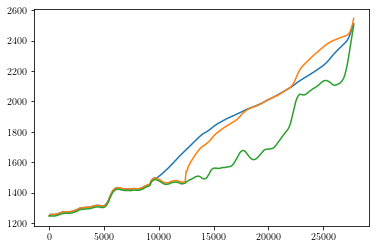

In [7]:
plt.plot(arrays[0].x, arrays[0].isel(t=1).z_s)
plt.plot(arrays[0].x, arrays[0].isel(t=-1).z_s)
#plt.plot(test.x, test.isel(t=-1).z_s)
plt.plot(arrays[0].x, arrays[0].isel(t=-1).z_b)

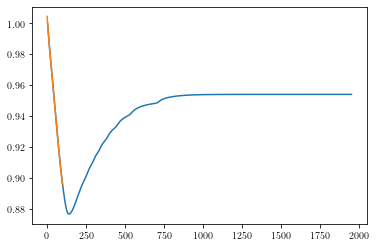

In [5]:
plt.plot(arrays[0].t[4:-50], arrays[0].Vol[4:-50])
plt.plot(arrays[1].t[1:], arrays[1].Vol[1:])